In [1]:
import pandas as pd

# Construct the dataset
data = {
    'Student Type': ['Btech', 'Mtech', 'Mtech', 'MCA', 'Btech', 'MCA', 'Btech', 'Mtech'],
    'CGPA': [9, 8, 7, 9, 7, 8, 8, 9],
    'Placement Registration': ['Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'Aptitude Level': ['High', 'Medium', 'Low', 'High', 'Medium', 'High', 'Low', 'Medium'],
    'Communication Skill': ['VG', 'G', 'N', 'VG', 'G', 'N', 'VG', 'G'],
    'Placement': ['SD', 'D', 'O', 'SD', 'D', 'O', 'SD', 'D']  # TARGET VARIABLE
}

df = pd.DataFrame(data)
print(df)


  Student Type  CGPA Placement Registration Aptitude Level  \
0        Btech     9                    Yes           High   
1        Mtech     8                     No         Medium   
2        Mtech     7                    Yes            Low   
3          MCA     9                    Yes           High   
4        Btech     7                     No         Medium   
5          MCA     8                    Yes           High   
6        Btech     8                    Yes            Low   
7        Mtech     9                     No         Medium   

  Communication Skill Placement  
0                  VG        SD  
1                   G         D  
2                   N         O  
3                  VG        SD  
4                   G         D  
5                   N         O  
6                  VG        SD  
7                   G         D  


In [2]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders
le_student_type = LabelEncoder()
le_registration = LabelEncoder()
le_aptitude = LabelEncoder()
le_communication = LabelEncoder()
le_placement = LabelEncoder()

# Encode categorical columns
df['Student Type'] = le_student_type.fit_transform(df['Student Type'])
df['Placement Registration'] = le_registration.fit_transform(df['Placement Registration'])
df['Aptitude Level'] = le_aptitude.fit_transform(df['Aptitude Level'])
df['Communication Skill'] = le_communication.fit_transform(df['Communication Skill'])
df['Placement'] = le_placement.fit_transform(df['Placement'])

print(df)


   Student Type  CGPA  Placement Registration  Aptitude Level  \
0             0     9                       1               0   
1             2     8                       0               2   
2             2     7                       1               1   
3             1     9                       1               0   
4             0     7                       0               2   
5             1     8                       1               0   
6             0     8                       1               1   
7             2     9                       0               2   

   Communication Skill  Placement  
0                    2          2  
1                    0          0  
2                    1          1  
3                    2          2  
4                    0          0  
5                    1          1  
6                    2          2  
7                    0          0  


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Split the data into features and target variable
X = df.drop('Placement', axis=1)
y = df['Placement']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predict the test set results
y_pred = clf.predict(X_test)

# Print accuracy
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.6666666666666666


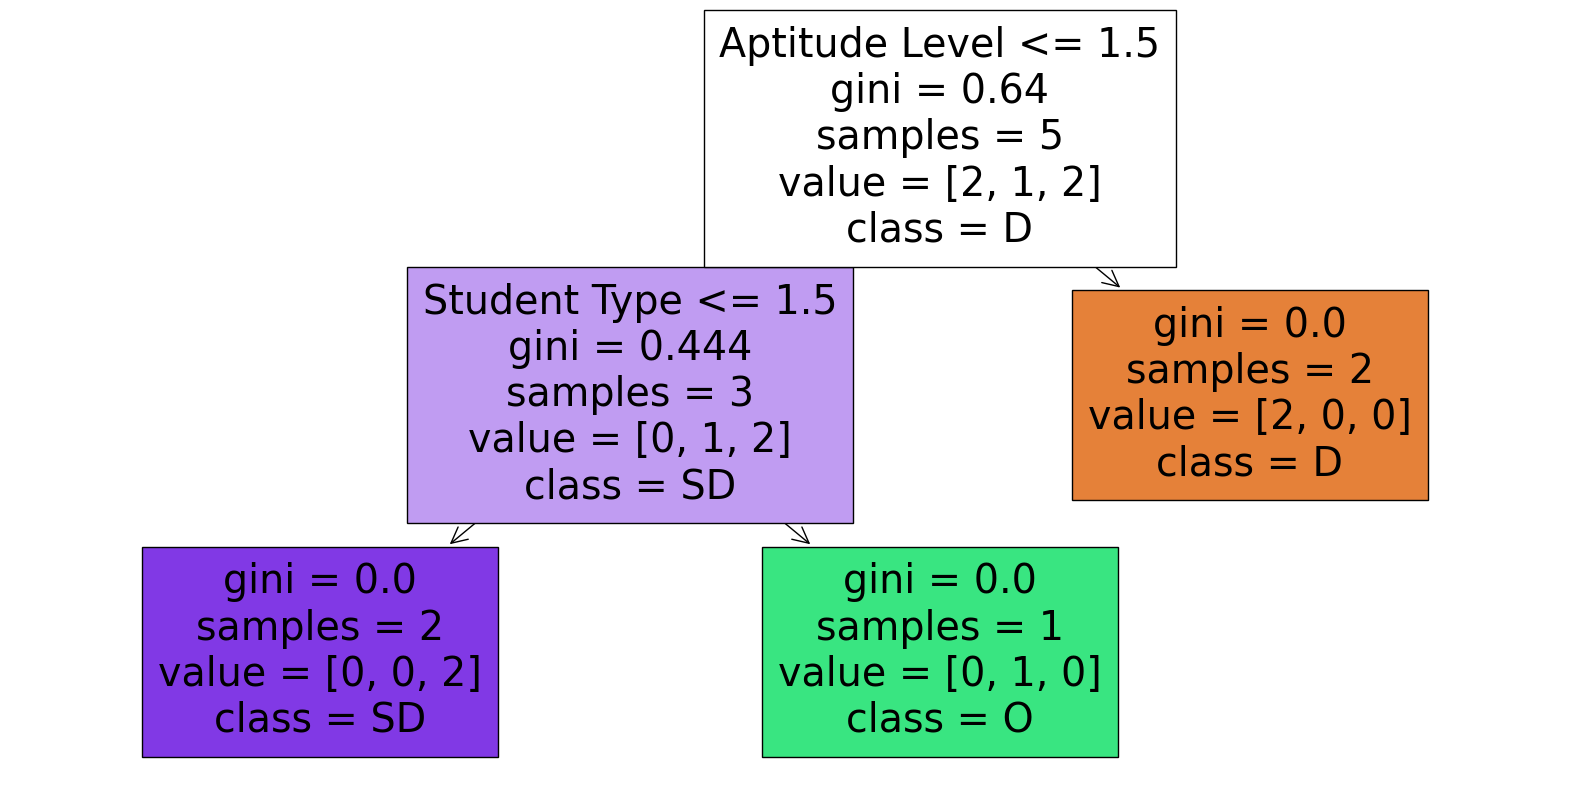

In [4]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=le_placement.classes_, filled=True)
plt.show()
